In [7]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


In [46]:


# Caricare il file Excel
df = pd.read_excel("C:/Users/readytouse/Desktop/Magistrale/banking/project 1 14-03-2024/final dataset.xlsx")# Sostituisci con il nome del tuo file
# Elimino i dati mancanti
df=df[["COUNTRY","YEAR","W_NIM","W_ROAE", "W_TIER1_ratio", "W_Impaired_ratio"]].dropna()
df


,COUNTRY,YEAR,W_NIM,W_ROAE,W_TIER1_ratio,W_Impaired_ratio
0,Austria,2019,2.3760,9.9692,15.1404,2.7528
1,Austria,2020,2.2004,5.3956,16.2120,2.8740
2,Austria,2021,2.1732,10.3604,15.7680,2.4156
3,Austria,2022,2.5792,14.9736,16.3400,2.4224
4,Austria,2023,2.8360,14.0988,17.8400,2.7532
...,...,...,...,...,...,...
103,Spain,2020,2.6270,-4.1620,13.8090,3.6410
104,Spain,2021,2.6840,10.5860,14.0360,3.5620
105,Spain,2022,3.0060,11.8280,13.6880,3.2890
106,Spain,2023,3.2180,13.2220,13.8890,3.3880


In [29]:
df.COUNTRY = df.COUNTRY.str.lstrip()  
df.COUNTRY = df.COUNTRY.str.rstrip()

In [5]:
df["YEAR"] = pd.to_datetime(df["YEAR"])

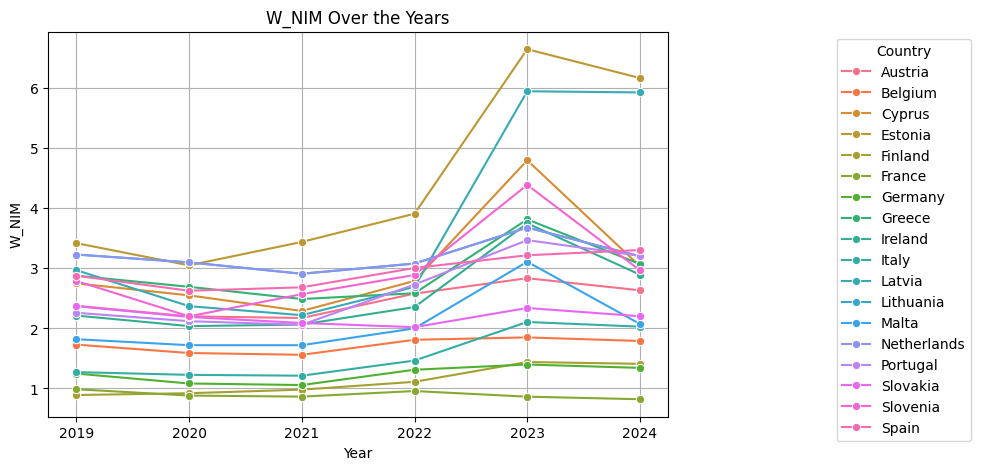

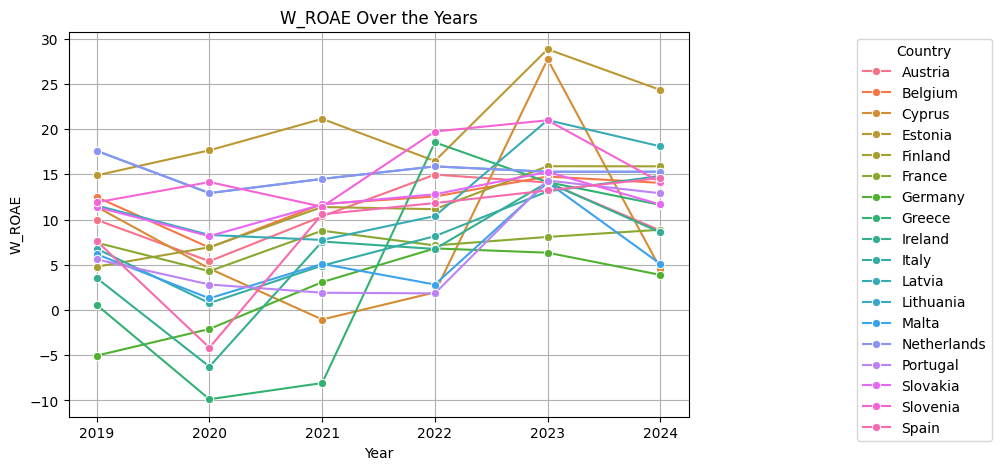

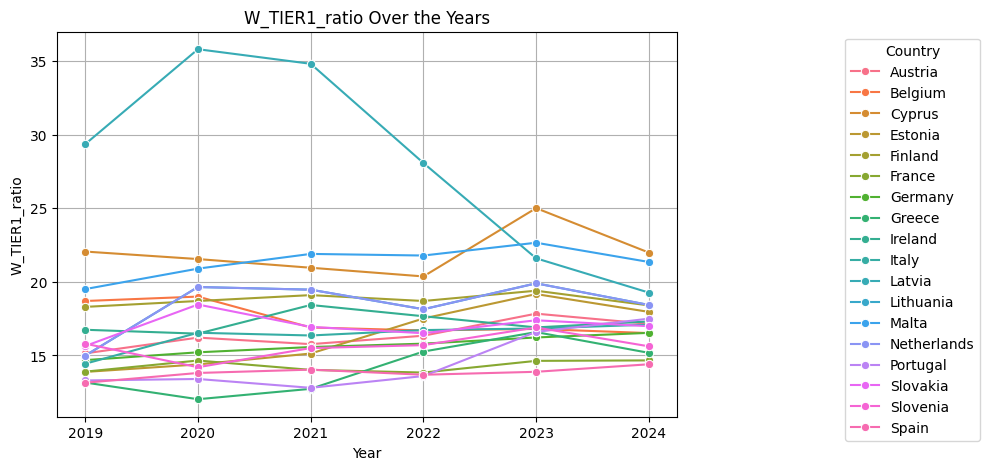

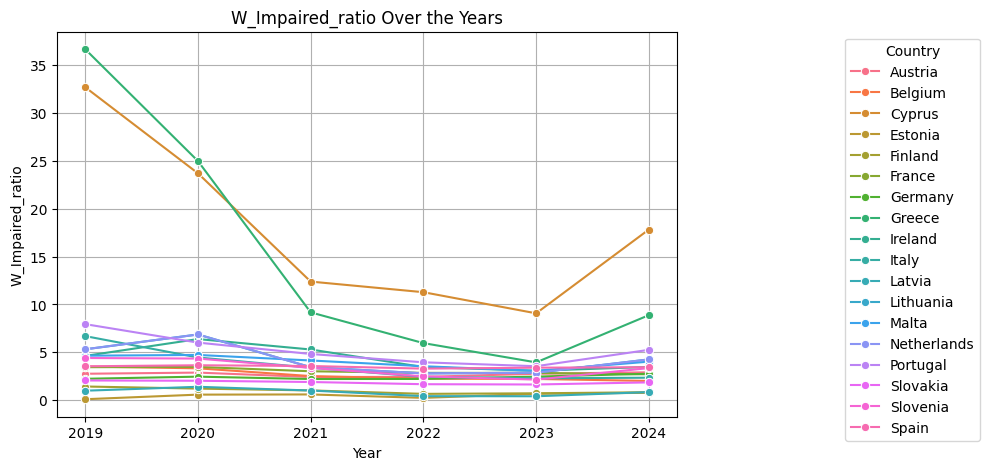

In [42]:
metrics = ["W_NIM", "W_ROAE", "W_TIER1_ratio", "W_Impaired_ratio"]

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x="YEAR", y=metric, hue="COUNTRY", marker="o")
    plt.title(f"{metric} Over the Years")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.legend(title="Country", bbox_to_anchor=(1.5, 1), loc="upper right")
    plt.grid(True)
    plt.savefig(f"{metric}_plot.png", bbox_inches="tight") 
    plt.show()



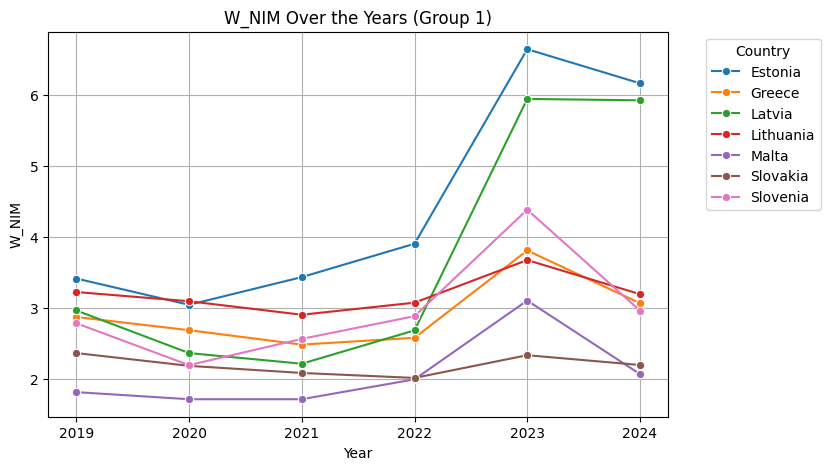

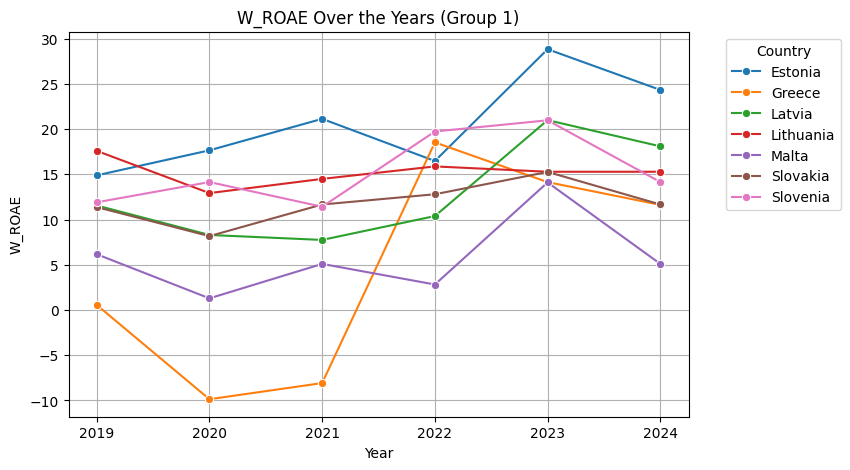

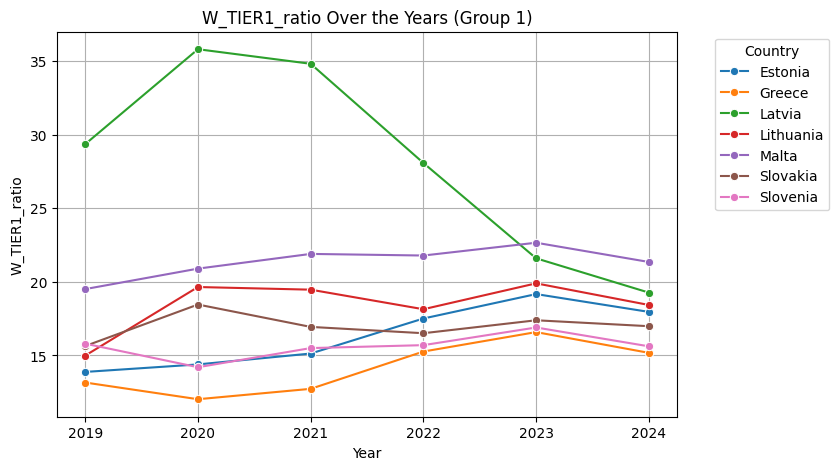

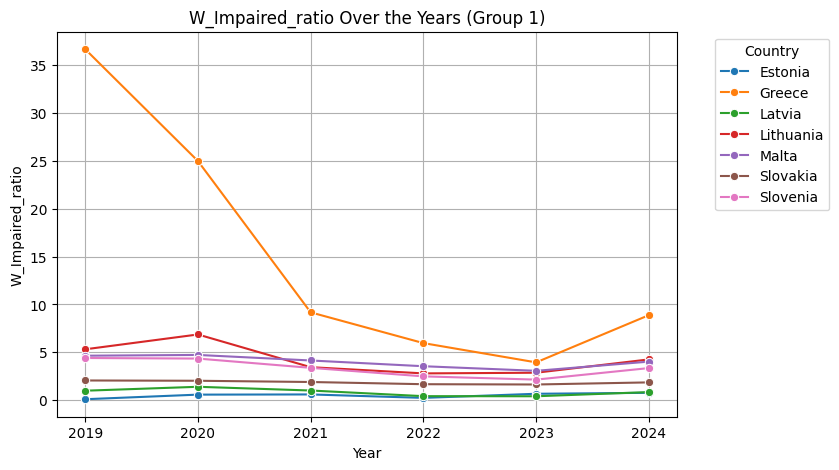

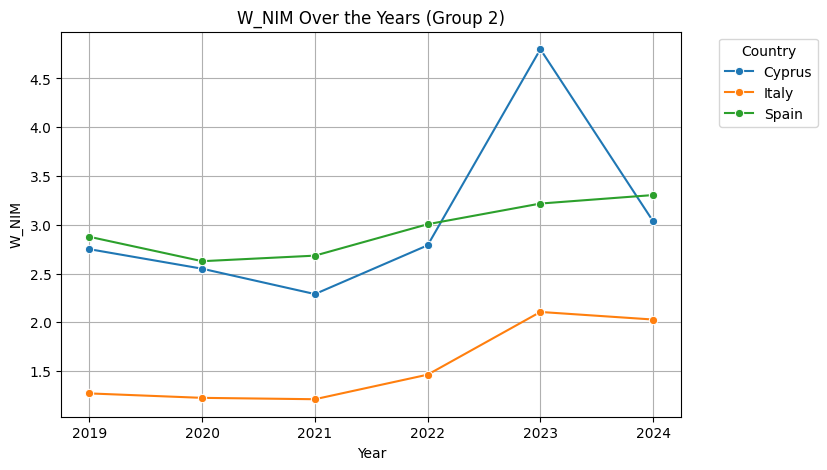

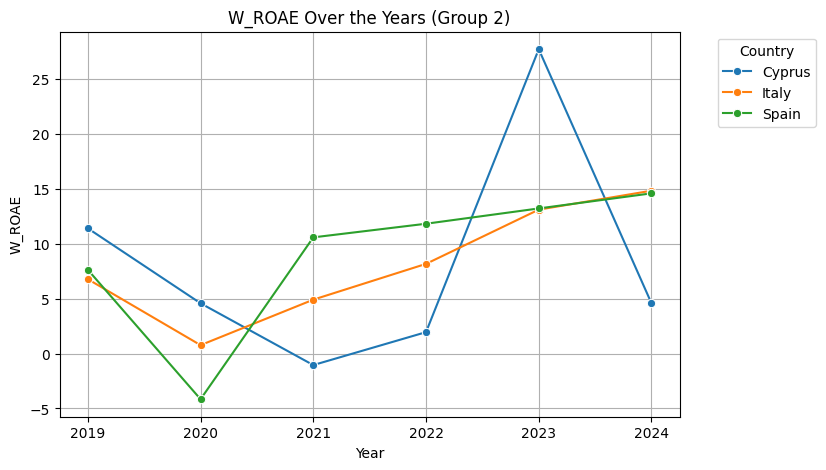

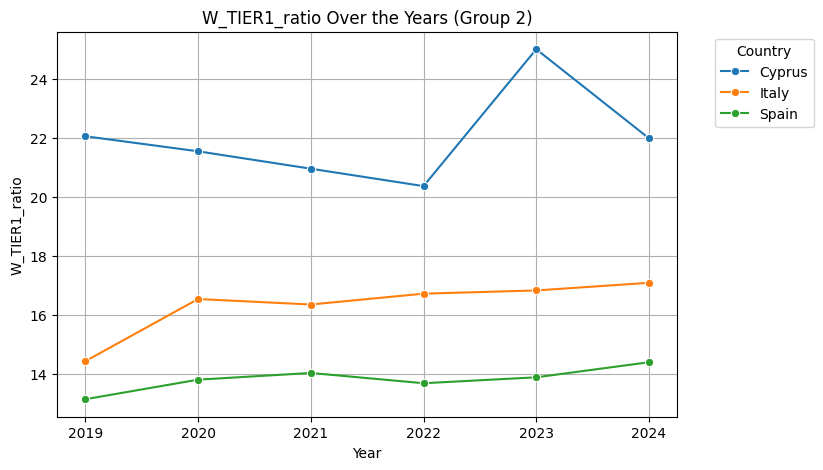

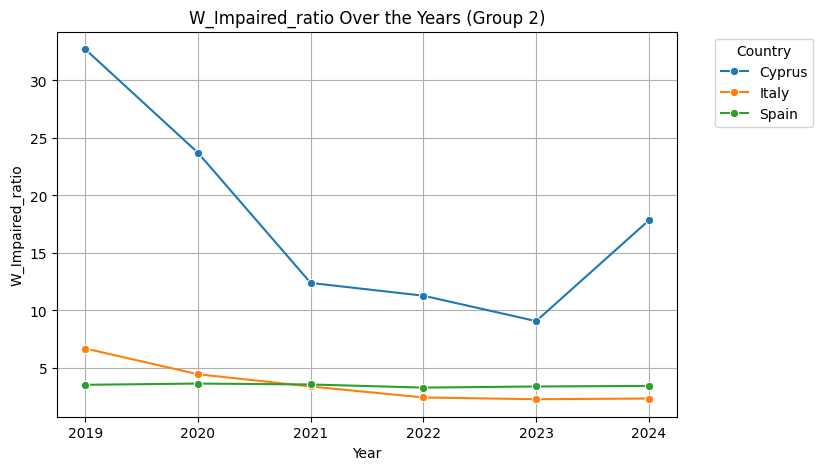

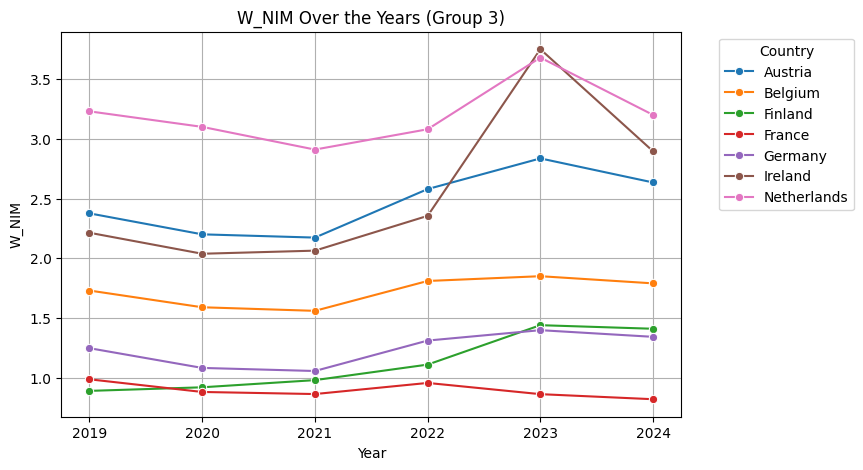

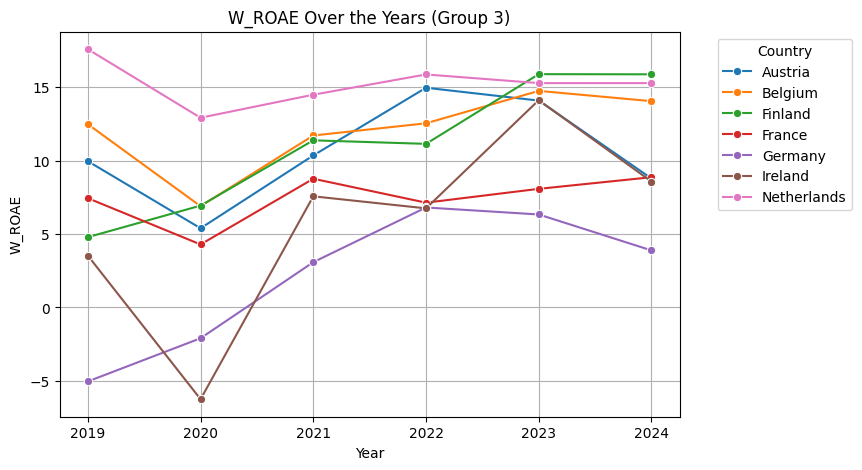

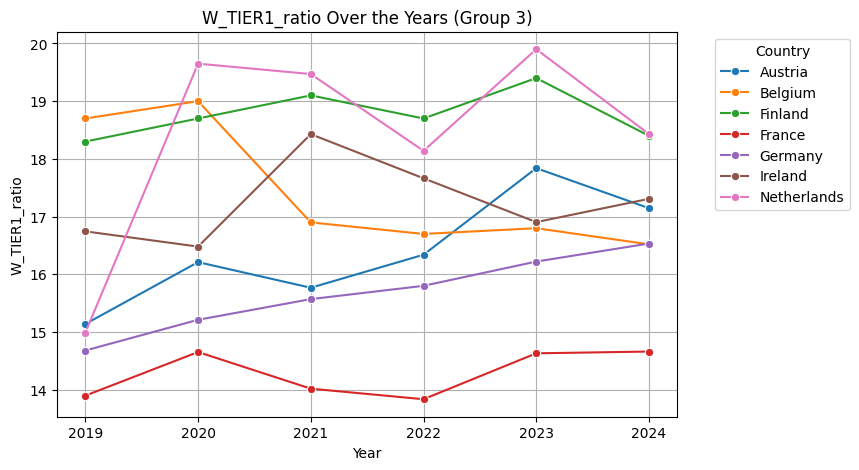

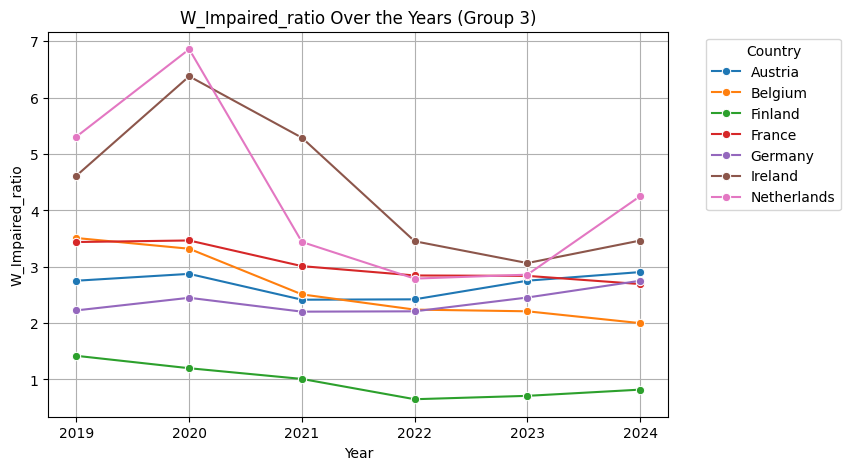

In [43]:
# Define country groups
group_1 = ["Latvia", "Lithuania", "Estonia", "Slovakia", "Greece","Slovenia", "Malta"]
group_2 = ["Cyprus", "Spain", "Italy"]
group_3 = ["France", "Belgium", "Germany", "Finland", "Austria", 
           "Netherlands", "Ireland"]

# Store groups in a dictionary for easy iteration
country_groups = {"Group 1": group_1, "Group 2": group_2, "Group 3": group_3}

# Define the metrics to plot
metrics = ["W_NIM", "W_ROAE", "W_TIER1_ratio", "W_Impaired_ratio"]

# Iterate over each country group
for group_name, countries in country_groups.items():
    df_group = df[df["COUNTRY"].isin(countries)]  # Filter DataFrame for the current group
    
    # Plot each metric separately for the current group
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        sns.lineplot(data=df_group, x="YEAR", y=metric, hue="COUNTRY", marker="o")
        
        plt.title(f"{metric} Over the Years ({group_name})")
        plt.xlabel("Year")
        plt.ylabel(metric)
        plt.grid(True)
        
        # Place the legend outside the plot to avoid overlap
        plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
        # Salva con un nome diverso per ogni metrica
        plt.savefig(f"{metric} Over the Years ({group_name})plot.png", bbox_inches="tight") 
        
        plt.show()

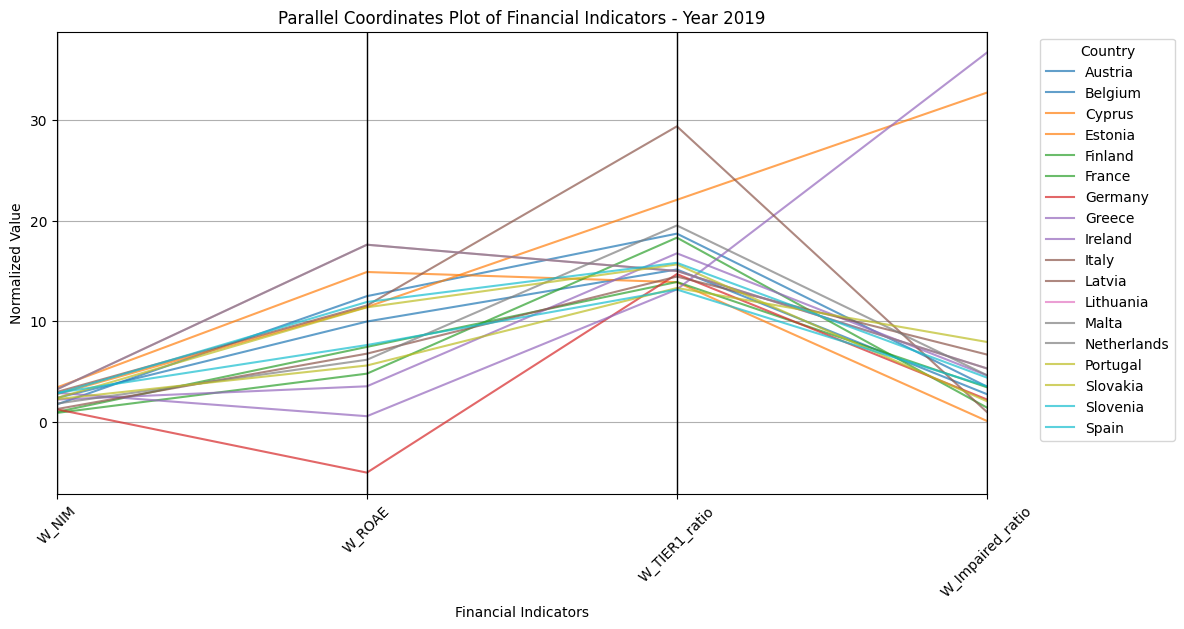

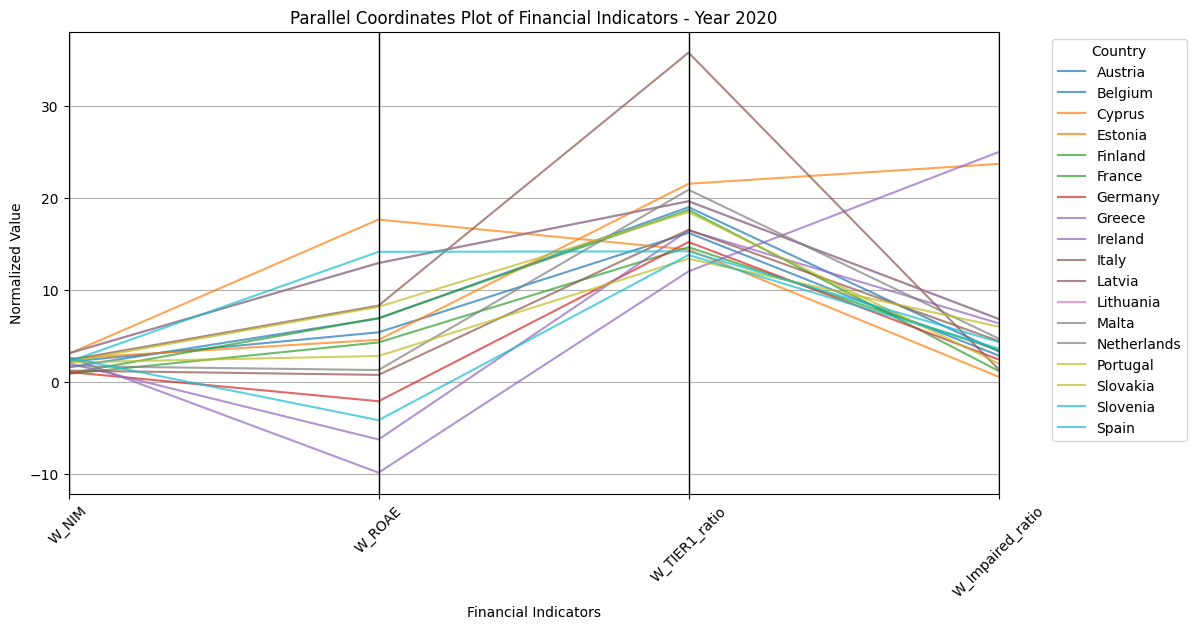

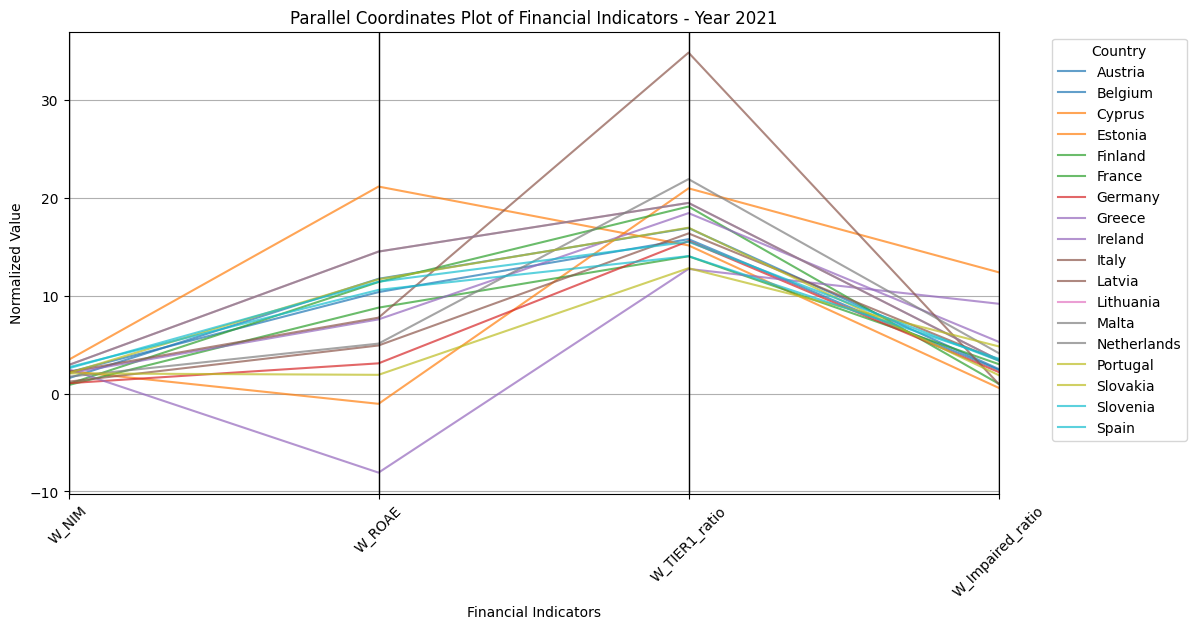

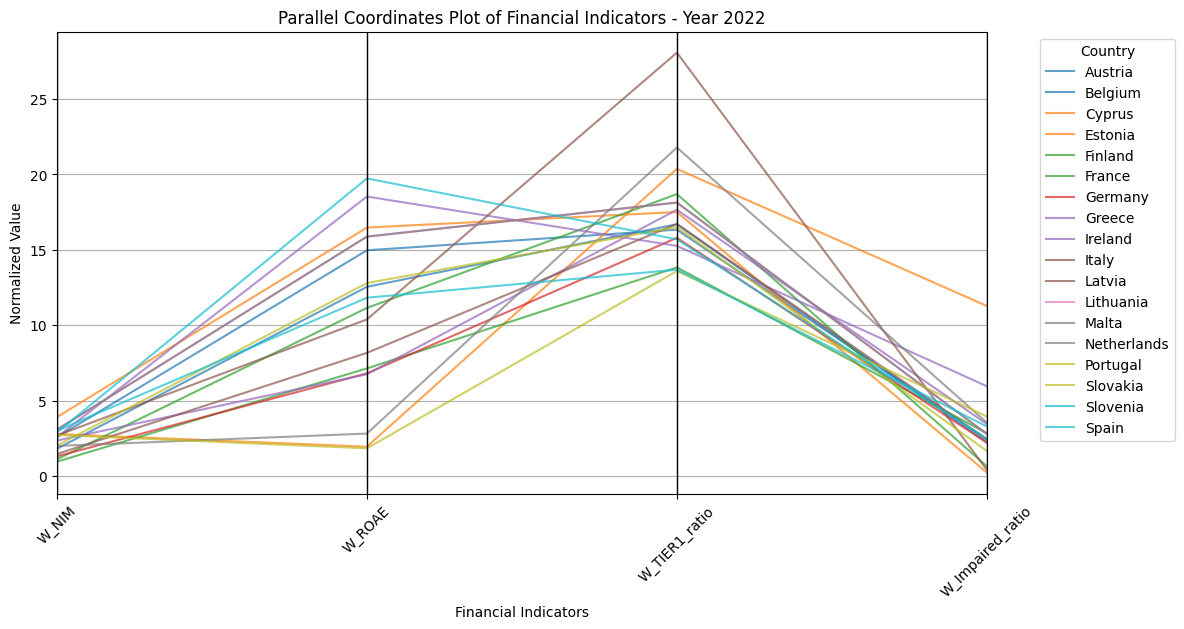

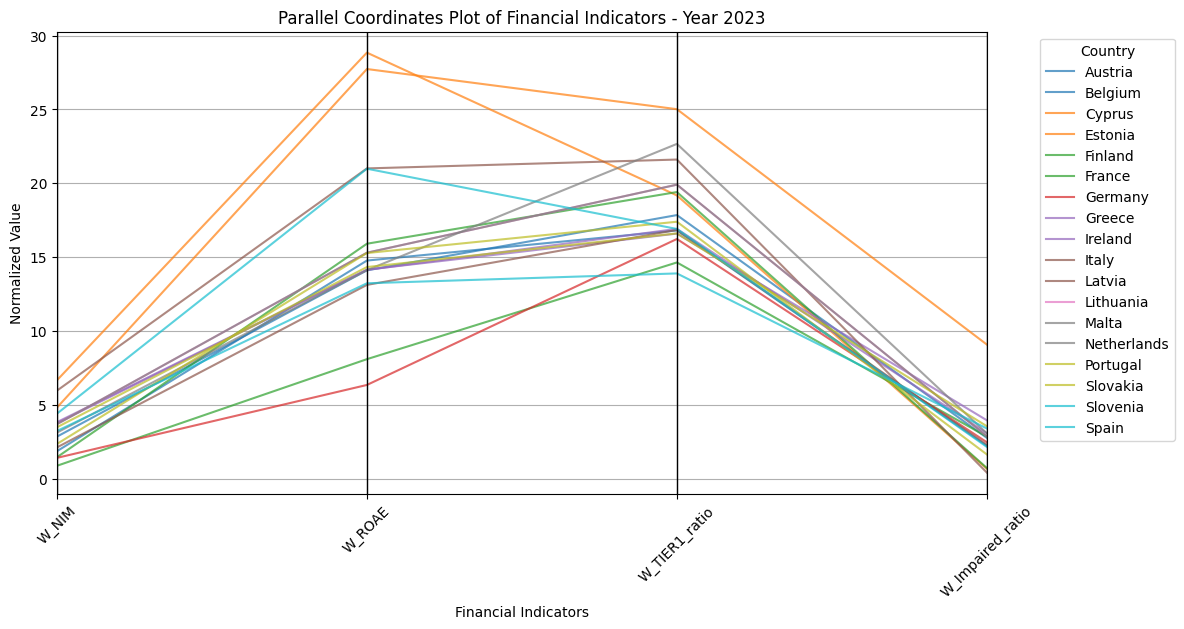

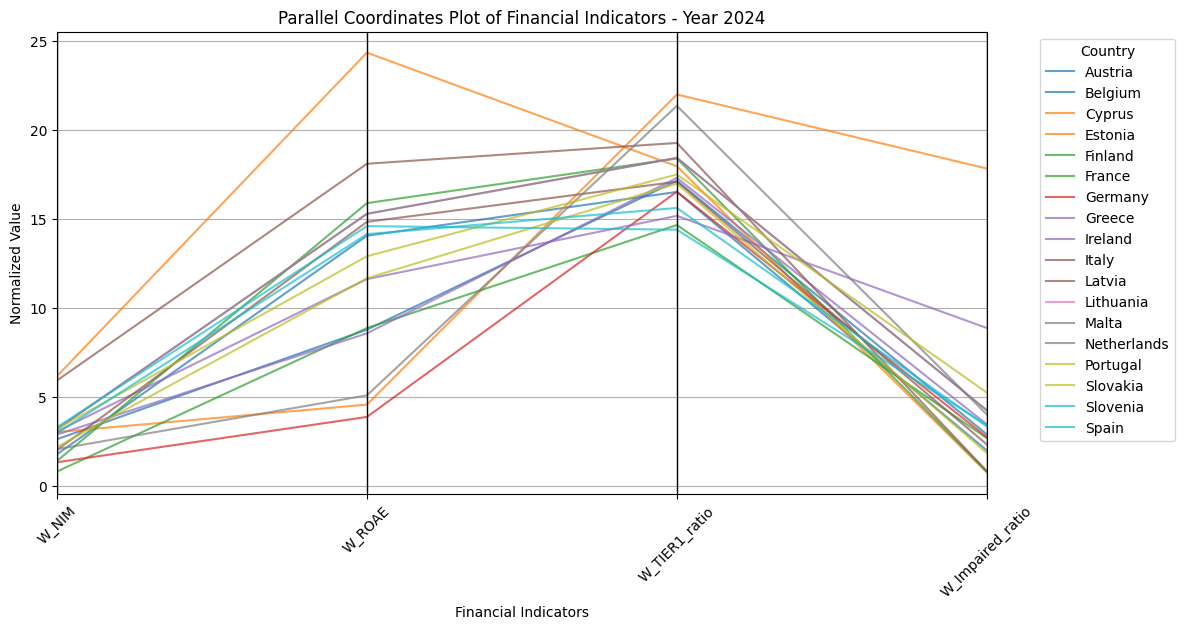

In [44]:

# Ottenere gli anni unici nel dataset
unique_years = sorted(df["YEAR"].unique())[:6]  # Prendere solo i primi 5 anni se ce ne sono più di 5

# Creare un grafico parallelo per ogni anno disponibile
for year in unique_years:
    df_year = df[df["YEAR"] == year].copy()  # Filtrare i dati per l'anno specifico

    # Rimuovere la colonna YEAR prima della normalizzazione
    df_year = df_year.drop(columns=["YEAR"])

    # Creare il grafico a coordinate parallele
    plt.figure(figsize=(12, 6))
    parallel_coordinates(df_year, class_column="COUNTRY", colormap=plt.get_cmap("tab10"), alpha=0.7)

    # Personalizzare il grafico
    plt.title(f"Parallel Coordinates Plot of Financial Indicators - Year {year}")
    plt.xlabel("Financial Indicators")
    plt.ylabel("Normalized Value")
    plt.xticks(rotation=45)
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.savefig(f"parallel plot in different {year} .png", bbox_inches="tight") 

    # Mostrare il grafico
    plt.show()
